In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

path = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68616192/68606236 [==============================] - 1s 0us/step


In [3]:
train_dir = os.path.join(path, 'train')
validation_dir = os.path.join(path, 'validation')
print(train_dir)
print(validation_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation


In [4]:
# directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats') 
print(train_cats_dir)

# directory with our training dog pictures 
train_dogs_dir = os.path.join(train_dir, 'dogs')  
print(train_dogs_dir)

# directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  
print(validation_cats_dir)

# directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  
print(validation_dogs_dir)

/aiffel/.keras/datasets/cats_and_dogs_filtered/train/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/train/dogs
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/cats
/aiffel/.keras/datasets/cats_and_dogs_filtered/validation/dogs


In [5]:
num_cats_tr = len(os.listdir(train_cats_dir))
print('total training cat images:', num_cats_tr)
num_dogs_tr = len(os.listdir(train_dogs_dir))
print('total training dog images:', num_dogs_tr)

print("--")

num_cats_val = len(os.listdir(validation_cats_dir))
print('total validation cat images:', num_cats_val)
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('total validation dog images:', num_dogs_val)

print("--")

total_train = num_cats_tr + num_dogs_tr
print("Total training images:", total_train)
total_val = num_cats_val + num_dogs_val
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
--
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [6]:
# parameter Initialization
batch_size = 16
epochs = 5
IMG_HEIGHT = 256
IMG_WIDTH = 256

In [7]:
# 데이터를 시각화하기 위한 함수
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [8]:
# Training data generator
image_gen_train = ImageDataGenerator(rescale=1./255,
                                     rotation_range=0.3,
                                     width_shift_range=0.1,
                                     height_shift_range=0.1,
                                     zoom_range=0.2,
                                     horizontal_flip=True, 
                                     vertical_flip=False)

In [9]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


In [10]:
train_data_gen[0][0].shape

(16, 256, 256, 3)

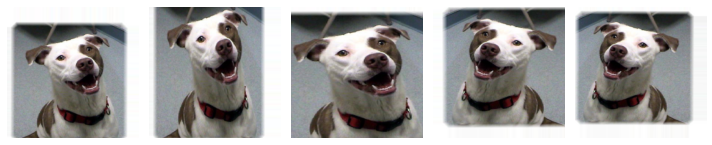

In [11]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [12]:
# Validation data generator
image_gen_val = ImageDataGenerator(rescale=1./255)

In [13]:
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')

Found 1000 images belonging to 2 classes.


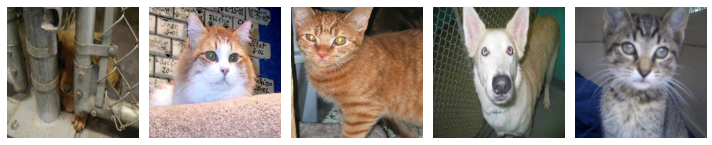

array([1., 0., 0., 1., 0.], dtype=float32)

In [14]:
sample_training_images, _ = next(val_data_gen)
plotImages(sample_training_images[:5])
_[:5] # 정답 데이터

In [43]:
# 문제1-1. 이미지에 나온 VGG16 모델을 구현하세요.  
input_layer=tf.keras.layers.Input(shape=(256, 256, 3))
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x=tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Conv2D(1024, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(1024, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.Conv2D(1024, (3, 3), strides=1, activation='relu', padding='same')(x)
x=tf.keras.layers.BatchNormalization()(x)
x=tf.keras.layers.MaxPool2D((2, 2))(x)

x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(1024, activation='relu')(x)
x=tf.keras.layers.Dense(518, activation='relu')(x)
out_layer=tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 256, 256, 64)      1792      
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 256, 256, 64)      36928     
_________________________________________________________________
batch_normalization_15 (Batc (None, 256, 256, 64)      256       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 128, 128, 128)     1475

In [44]:
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.Adam(learning_rate=0.01)
metric=tf.keras.metrics.binary_accuracy
model.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

In [45]:
batch_size = 20
steps_per_epoch = 100
history = model.fit(
      train_data_gen,
      steps_per_epoch=int((len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/batch_size),
      epochs=steps_per_epoch,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/100
100/100 [==============================] - 40s 392ms/step - loss: 59.6873 - binary_accuracy: 0.5094 - val_loss: 0.6949 - val_binary_accuracy: 0.5150
Epoch 2/100
100/100 [==============================] - 39s 384ms/step - loss: 0.7020 - binary_accuracy: 0.4981 - val_loss: 0.6958 - val_binary_accuracy: 0.5020
Epoch 3/100
100/100 [==============================] - 38s 381ms/step - loss: 0.6951 - binary_accuracy: 0.5069 - val_loss: 0.6964 - val_binary_accuracy: 0.4970
Epoch 4/100
100/100 [==============================] - 38s 380ms/step - loss: 0.6940 - binary_accuracy: 0.4850 - val_loss: 0.6929 - val_binary_accuracy: 0.5090
Epoch 5/100
100/100 [==============================] - 38s 377ms/step - loss: 0.6952 - binary_accuracy: 0.4956 - val_loss: 0.6926 - val_binary_accuracy: 0.4990
Epoch 6/100
100/100 [==============================] - 38s 376ms/step - loss: 0.6939 - binary_accuracy: 0.4906 - val_loss: 0.6938 - val_binary_accuracy: 0.4980
Epoch 7/100
100/100 [==================

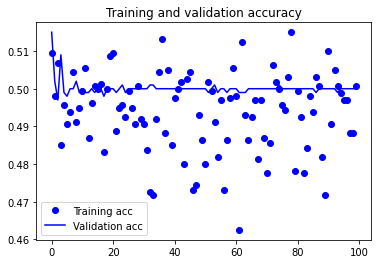

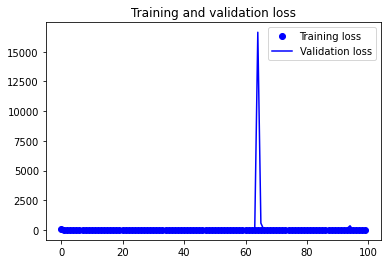

In [46]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [51]:
#문제 1-2. 다양한 방법을 사용하여 모델의 성능 올리기
from tensorflow import keras

input_layer = tf.keras.layers.Input(shape=(256, 256, 3))

# Initial input merge (skip connection)
merge_input = keras.layers.Conv2D(64, (1, 1), padding='same', activation='relu')(input_layer)

# Block 1
x = tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(input_layer)
x = tf.keras.layers.Conv2D(64, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

# Skip connection from input to block 1 output
skip_1 = keras.layers.Conv2D(64, (1, 1), strides=(2, 2), padding='same')(input_layer)
x = keras.layers.Add()([x, skip_1])
x = keras.layers.Activation('relu')(x)

# Block 2
x = tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(128, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

# Skip connection for block 2
skip_2 = keras.layers.Conv2D(128, (1, 1), strides=(2, 2), padding='same')(skip_1)
x = keras.layers.Add()([x, skip_2])
x = keras.layers.Activation('relu')(x)

# # Block 3
x = tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(256, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

# Skip connection for block 3
skip_3 = keras.layers.Conv2D(256, (1, 1), strides=(2, 2), padding='same')(skip_2)
x = keras.layers.Add()([x, skip_3])
x = keras.layers.Activation('relu')(x)

# Block 4
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(512, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

# Skip connection for block 4
skip_4 = keras.layers.Conv2D(512, (1, 1), strides=(2, 2), padding='same')(skip_3)
x = keras.layers.Add()([x, skip_4])
x = keras.layers.Activation('relu')(x)

# # Block 5
x = tf.keras.layers.Conv2D(1024, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(1024, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.Conv2D(1024, (3, 3), strides=1, activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.MaxPool2D((2, 2))(x)

# Skip connection for block 5
skip_5 = keras.layers.Conv2D(1024, (1, 1), strides=(2, 2), padding='same')(skip_4)
x = keras.layers.Add()([x, skip_5])
x = keras.layers.Activation('relu')(x)

# Flatten and dense layers
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)

# Output layer
out_layer = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Define the model
model_1 = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])

# Model summary
model_1.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_78 (Conv2D)              (None, 256, 256, 64) 1792        input_6[0][0]                    
__________________________________________________________________________________________________
conv2d_79 (Conv2D)              (None, 256, 256, 64) 36928       conv2d_78[0][0]                  
__________________________________________________________________________________________________
batch_normalization_25 (BatchNo (None, 256, 256, 64) 256         conv2d_79[0][0]                  
____________________________________________________________________________________________

In [52]:
loss_function=tf.keras.losses.binary_crossentropy
optimize=tf.keras.optimizers.RMSprop(learning_rate=0.0001)
metric=tf.keras.metrics.binary_accuracy
model_1.compile(loss=loss_function,
              optimizer=optimize,
              metrics=[metric])

In [53]:
history_3 = model_1.fit(
      train_data_gen,
      steps_per_epoch=int((len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))/16),
      epochs=100,
      validation_data=val_data_gen,
      # callbacks=callbacks_list,
      validation_freq=1)

Epoch 1/100
125/125 [==============================] - 53s 402ms/step - loss: 1.5820 - binary_accuracy: 0.5425 - val_loss: 0.6945 - val_binary_accuracy: 0.5000
Epoch 2/100
125/125 [==============================] - 52s 411ms/step - loss: 0.7296 - binary_accuracy: 0.5845 - val_loss: 0.7074 - val_binary_accuracy: 0.5290
Epoch 3/100
125/125 [==============================] - 52s 415ms/step - loss: 0.6624 - binary_accuracy: 0.6280 - val_loss: 1.4426 - val_binary_accuracy: 0.5010
Epoch 4/100
125/125 [==============================] - 52s 414ms/step - loss: 0.6300 - binary_accuracy: 0.6715 - val_loss: 1.7302 - val_binary_accuracy: 0.5070
Epoch 5/100
125/125 [==============================] - 52s 414ms/step - loss: 0.5877 - binary_accuracy: 0.7055 - val_loss: 2.2198 - val_binary_accuracy: 0.5430
Epoch 6/100
125/125 [==============================] - 52s 413ms/step - loss: 0.5552 - binary_accuracy: 0.7255 - val_loss: 0.6112 - val_binary_accuracy: 0.7440
Epoch 7/100
125/125 [===================

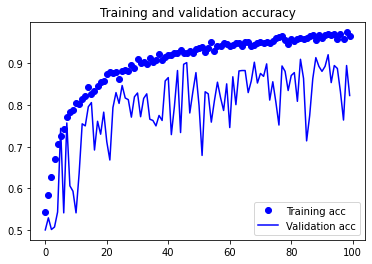

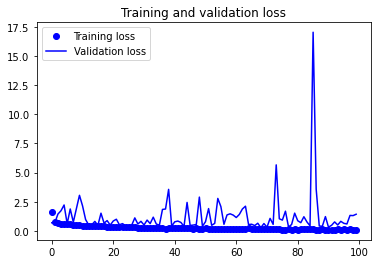

In [54]:
acc = history_3.history['binary_accuracy']
val_acc = history_3.history['val_binary_accuracy']
loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

epochs_range = range(len(acc))

plt.plot(epochs_range, acc, 'bo', label='Training acc')
plt.plot(epochs_range, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs_range, loss, 'bo', label='Training loss')
plt.plot(epochs_range, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()